In [1]:
import scipy.io
import h5py
import cv2
from pylab import *
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os
from skimage import transform as tf
import random
import caffe
import math
from shutil import copyfile
from scipy import interpolate
import data_augmentation
import data_preprocess
%matplotlib inline

In [4]:
data_dir = '/media/ai2-leia/data_disk/data_sets/robot_RGB-depth'
raw_dir = os.path.join(data_dir, '640x480/raw')
preprocessed_dir = os.path.join(data_dir, '640x480/preprocessed')
raw_rgb_dir = os.path.join(raw_dir, 'rgb')
raw_depth_dir = os.path.join(raw_dir, 'depth')
pre_rgb_dir = os.path.join(preprocessed_dir, 'rgb')
pre_depth_dir = os.path.join(preprocessed_dir, 'depth')

In [5]:
index_list = [filename.split('_')[0] for filename in os.listdir(raw_rgb_dir)]

data_pairs = [(cv2.imread(os.path.join(raw_rgb_dir, index + '_rgb.jpg')), 
               np.load(os.path.join(raw_depth_dir, index + '_depth.npy'))) for index in index_list]

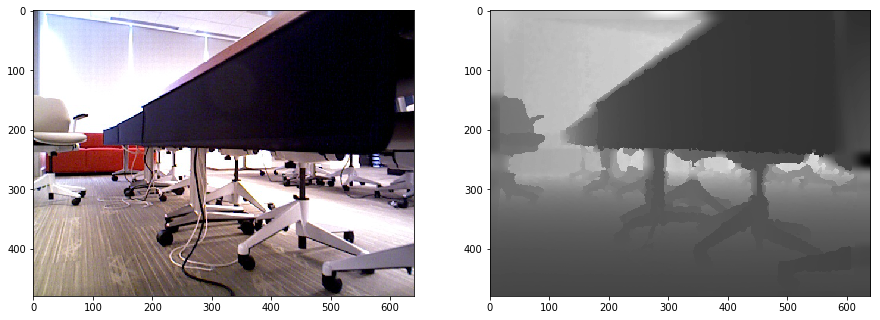

In [21]:
idx = random.randint(0, len(data_pairs)-1)
rgb, depth = data_pairs[idx]
depth_pre = data_preprocess.fill_in_nan(depth)

f, axarr = plt.subplots(1, 2, figsize=(15,15))
axarr[0].imshow(rgb)
axarr[1].imshow(depth_pre, cmap='gray')

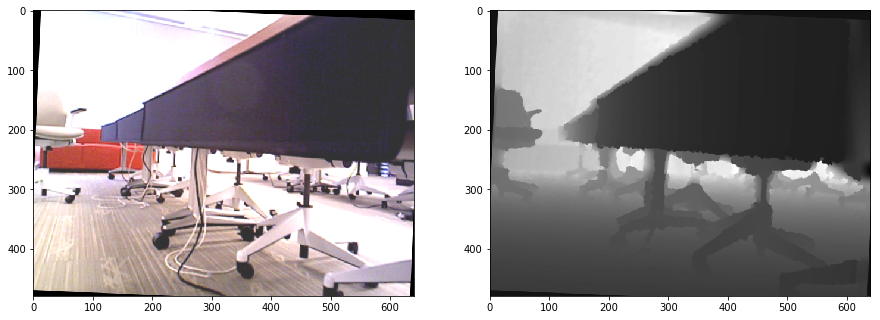

In [29]:
rgb_aug, depth_aug = data_augmentation.random_augmentation(rgb, depth_pre)

f, axarr = plt.subplots(1, 2, figsize=(15,15))
axarr[0].imshow(rgb_aug)
axarr[1].imshow(depth_aug, cmap='gray')

In [ ]:
# rm_ct = 0
# ct = 0
# for index in index_list:
#     ct += 1
#     rgb_file = os.path.join(raw_rgb_dir, index + '_rgb.jpg')
#     depth_file = os.path.join(raw_depth_dir, index + '_depth.npy')

#     rgb_img = cv2.imread(rgb_file)
#     depth_img = np.load(depth_file)

#     ratio = np.sum(np.isnan(depth_img))/(depth_img.shape[0]*depth_img.shape[1])
#     if ratio > 0.25:
#         rm_ct += 1
#         pass
#     else:
#         depth_img_preproc = fill_in_nan(depth_img, interp_len=100, smooth_kernel_dim=10)
#         cv2.imwrite(os.path.join(preproc_rgb_dir, index + '_preprocessed_rgb.jpg'), rgb_img)
#         np.save(os.path.join(preproc_depth_dir, index + '_preprocessed_depth.npy'), depth_img_preproc)
#     if ct % 1000 == 0:
#         print(ct)

# Resize images

In [31]:
index_list = [filename.split('_')[0] for filename in os.listdir(pre_rgb_dir)]
pre_data_pairs = [(cv2.imread(os.path.join(pre_rgb_dir, index + '_preprocessed_rgb.jpg')), 
                   np.load(os.path.join(pre_depth_dir, index + '_preprocessed_depth.npy'))) for index in index_list]

In [41]:
depth = pre_data_pairs[0][1]
depth_320 = cv2.resize(depth, (320, 240))

In [239]:
# resize rgb images to 320x240
rgb_preprocessed_dir = '/media/ai2-bb8/data_disk/data_sets/robot_depthRGB/rgb/preprocessed/'
rgb_aux_dir = '/media/ai2-bb8/data_disk/data_sets/robot_depthRGB/rgb/aux/'

check = 0
for rgb_img in os.listdir(rgb_preprocessed_dir):
    if check < 3:
        #check += 1
        im = Image.open(rgb_preprocessed_dir + rgb_img).resize((320,240))
        os.chdir(rgb_aux_dir)
        im.save(rgb_img)

In [2]:
# def resize_rgb_image(rgb_img, new_width, new_height):
#     im = Image.open(rgb_img).resize((new_width, new_height))
    
#     return im 

# def resize_depth_image(depth_img, new_width, new_height):
#     im_depth = np.load(depth_img)
#     total = 0

#     for i in range(len(im_depth)):
#         for j in range(len(im_depth[0])):
#             total += im_depth[i][j]

#     for i in range(len(im_depth)):
#         for j in range(len(im_depth[0])):
#             im_depth[i][j] = im_depth[i][j]/total

#     im_depth = tf.resize(im_depth, (new_height, new_width), order=0)

#     for i in range(len(im_depth)):
#         for j in range(len(im_depth[0])):
#             im_depth[i][j] = im_depth[i][j]*total
            
#     return im_depth

In [17]:
# resize rgb images to 160x120
rgb_old_dir = '/media/ai2-bb8/data_disk/data_sets/robot_depthRGB/rgb/val_320x240augmented/'
rgb_new_dir = '/media/ai2-bb8/data_disk/data_sets/robot_depthRGB/rgb/val_160x120augmented/'

check = 0
for rgb_img in os.listdir(rgb_old_dir):
    if check < 3:
        #check += 1
        im = resize_rgb_image(rgb_old_dir + rgb_img, 160, 120)
        #plt.figure()
        #plt.imshow(im)
        os.chdir(rgb_new_dir)
        im.save(rgb_img)

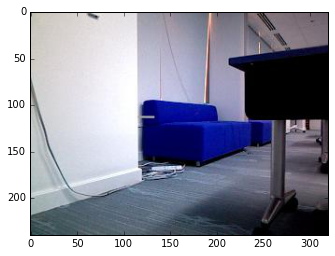

In [37]:
img = '/media/ai2-bb8/data_disk/data_sets/robot_depthRGB/rgb/320x240preprocessed/02700_rgb.jpg'

im = Image.open(img)
plt.imshow(im)

In [6]:
img = '/home/ai2-bb8/Documents/code/paul/depth_net/demo_pic4.jpg'
img_80x60 = '/home/ai2-bb8/Documents/code/paul/depth_net/demo_pic4_80x60.jpg'

img_resized = resize_rgb_image(img, 80, 60)

img_resized.save(img_80x60)

In [ ]:
# resize depth images to 160x120
depth_old_dir = '/media/ai2-bb8/data_disk/data_sets/robot_depthRGB/depth/train_320x240augmented/'
depth_new_dir = '/media/ai2-bb8/data_disk/data_sets/robot_depthRGB/depth/train_160x120augmented/'

check = 0
for depth_img in os.listdir(depth_old_dir):
    if check < 3:
        #check += 1
        im = resize_depth_image(depth_old_dir + depth_img, 160, 120)
        #plt.figure()
        #plt.imshow(im, cmap='gray')
        filename = depth_new_dir + depth_img
        np.save(filename, im)

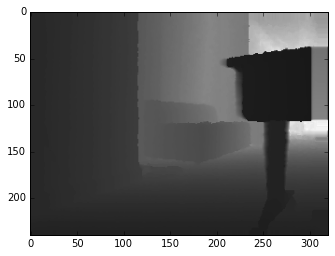

In [38]:
img = '/media/ai2-bb8/data_disk/data_sets/robot_depthRGB/depth/320x240preprocessed/02700_depth.npy'

im_depth = np.load(img)
plt.imshow(im_depth, cmap='gray')

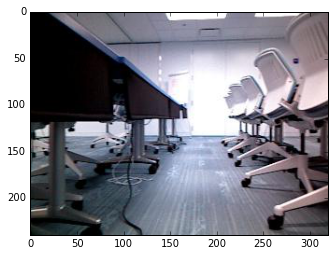

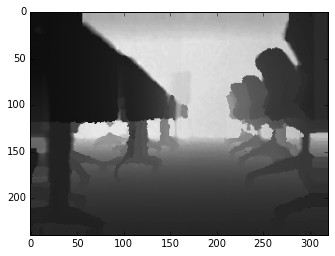

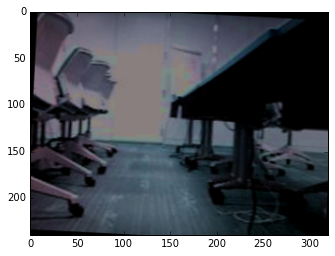

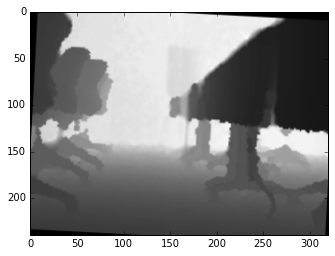

In [257]:
rgb_img = '/media/ai2-bb8/data_disk/data_sets/robot_depthRGB/rgb/320x240preprocessed/02546_rgb.jpg'
depth_img = '/media/ai2-bb8/data_disk/data_sets/robot_depthRGB/depth/320x240preprocessed/02546_depth.npy'

rgb_img = cv2.imread(rgb_img)
rgb_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2RGB)
depth_img = np.load(depth_img)

rgb_img_augmented, depth_img_augmented = random_augmentation(rgb_img, depth_img)

plt.figure(0)
plt.imshow(rgb_img)
plt.figure(1)
plt.imshow(depth_img, cmap='gray')
plt.figure(2)
plt.imshow(rgb_img_augmented)             
plt.figure(3)
plt.imshow(depth_img_augmented, cmap='gray')

In [18]:
# create augmented dataset
rgb_dir = '/media/ai2-bb8/data_disk/data_sets/robot_depthRGB/rgb/val_320x240preprocessed/'
depth_dir = '/media/ai2-bb8/data_disk/data_sets/robot_depthRGB/depth/val_320x240preprocessed/'
rgb_aug_dir = '/media/ai2-bb8/data_disk/data_sets/robot_depthRGB/rgb/val_320x240augmented/'
depth_aug_dir = '/media/ai2-bb8/data_disk/data_sets/robot_depthRGB/depth/val_320x240augmented/'

check = 0
new_img_id = -1
for depth_filename in os.listdir(depth_dir):
    #check += 1
    if check < 5:
        img_id = depth_filename.split('_')[0]

        rgb_img_loc = rgb_dir + str(img_id) + '_rgb.jpg'
        depth_img_loc = depth_dir + depth_filename
        
        rgb_img = cv2.imread(rgb_img_loc)
        depth_img = np.load(depth_img_loc)
        
        new_img_id += 1
        
        new_rgb_filename = rgb_aug_dir + str(new_img_id).zfill(5) + '_rgb.jpg'
        new_depth_filename = depth_aug_dir + str(new_img_id).zfill(5) + '_depth.npy'
        
        #print depth_img_loc, rgb_img_loc
        #print new_depth_filename, new_rgb_filename
        
        cv2.imwrite(new_rgb_filename, rgb_img)
        np.save(new_depth_filename, depth_img)
        
        for i in range(10):
            new_img_id += 1
            rgb_img_augmented, depth_img_augmented = random_augmentation(rgb_img, depth_img)
        
            new_rgb_filename = rgb_aug_dir + str(new_img_id).zfill(5) + '_rgb.jpg'
            new_depth_filename = depth_aug_dir + str(new_img_id).zfill(5) + '_depth.npy'
        
            cv2.imwrite(new_rgb_filename, rgb_img_augmented)
            np.save(new_depth_filename, depth_img_augmented)

In [1]:
# define function to create trainval image location txt files 
def create_trainval_loc_txt(rgb_dir, depth_dir, trainval_rgb_filename, trainval_depth_filename):
    rgb_list = []
    for rgb_img in os.listdir(rgb_dir):
        rgb_list.append(rgb_img)
    rgb_list = sorted(rgb_list)

    depth_list = []
    for depth_img in os.listdir(depth_dir):
        depth_list.append(depth_img)
    depth_list = sorted(depth_list)

    join_list = list(zip(rgb_list, depth_list))
    random.shuffle(join_list)
    rgb_list, depth_list = zip(*join_list)

    with open(trainval_rgb_filename, 'w') as write_file:
        for i in range(len(rgb_list)):
            img_loc = rgb_dir + rgb_list[i] + '\n'
            write_file.write(img_loc)

    with open(trainval_depth_filename, 'w') as write_file:
        for i in range(len(depth_list)):
            img_loc = depth_dir + depth_list[i] + '\n'
            write_file.write(img_loc)

In [29]:
# create trainval image location txt files for 160x120 images
rgb_dir = '/media/ai2-bb8/data_disk/data_sets/robot_depthRGB/rgb/val_160x120augmented/'
depth_dir = '/media/ai2-bb8/data_disk/data_sets/robot_depthRGB/depth/val_160x120augmented/'
trainval_data = '/media/ai2-bb8/data_disk/data_sets/robot_depthRGB/val_rgb_160x120augmented.txt'
trainval_labels = '/media/ai2-bb8/data_disk/data_sets/robot_depthRGB/val_depth_160x120augmented.txt'

create_trainval_loc_txt(rgb_dir, depth_dir, trainval_data, trainval_labels)

In [6]:
def split_trainval(trainval_text):
    trainval_list = []
    count = 0
    for line in trainval_text:
        count += 1
        trainval_list.append(line)
    train_list = trainval_list[:-(count/10)]
    val_list = trainval_list[-(count/10):]
    return train_list, val_list

In [7]:
def move_trainval_images(trainval_rgb_dir, trainval_depth_dir, trainval_rgb_loc, trainval_depth_loc, new_train_rgb_dir,
                        new_train_depth_dir, new_val_rgb_dir, new_val_depth_dir):
    num_data = 0
    for image in os.listdir(trainval_rgb_dir):
        num_data += 1
        
    with open(trainval_rgb_loc, 'r') as rgb_read_file:
        rgb_train_list, rgb_val_list = split_trainval(rgb_read_file)
        
    with open(trainval_depth_loc, 'r') as depth_read_file:
        depth_train_list, depth_val_list = split_trainval(depth_read_file)
    
    for i in range(len(rgb_train_list)):
        filename = rgb_train_list[i].split('/')[-1].split('\n')[0]
        copyfile(rgb_train_list[i].split('\n')[0], new_train_rgb_dir + filename)
        
    for i in range(len(depth_train_list)):
        filename = depth_train_list[i].split('/')[-1].split('\n')[0]
        copyfile(depth_train_list[i].split('\n')[0], new_train_depth_dir + filename)
        
    for i in range(len(rgb_val_list)):
        filename = rgb_val_list[i].split('/')[-1].split('\n')[0]
        copyfile(rgb_val_list[i].split('\n')[0], new_val_rgb_dir + filename)
        
    for i in range(len(depth_val_list)):
        filename = depth_val_list[i].split('/')[-1].split('\n')[0]
        copyfile(depth_val_list[i].split('\n')[0], new_val_depth_dir + filename)

In [8]:
trainval_rgb_dir = '/media/ai2-bb8/data_disk/data_sets/robot_depthRGB/rgb/320x240preprocessed/'
trainval_depth_dir = '/media/ai2-bb8/data_disk/data_sets/robot_depthRGB/depth/320x240preprocessed/'
trainval_rgb_loc = '/media/ai2-bb8/data_disk/data_sets/robot_depthRGB/320x240preprocessed_rgb_trainval.txt'
trainval_depth_loc = '/media/ai2-bb8/data_disk/data_sets/robot_depthRGB/320x240preprocessed_depth_trainval.txt'
new_train_rgb_dir = '/media/ai2-bb8/data_disk/data_sets/robot_depthRGB/rgb/train_320x240preprocessed/'
new_train_depth_dir = '/media/ai2-bb8/data_disk/data_sets/robot_depthRGB/depth/train_320x240preprocessed/'
new_val_rgb_dir = '/media/ai2-bb8/data_disk/data_sets/robot_depthRGB/rgb/val_320x240preprocessed/'
new_val_depth_dir = '/media/ai2-bb8/data_disk/data_sets/robot_depthRGB/depth/val_320x240preprocessed/'

move_trainval_images(trainval_rgb_dir, trainval_depth_dir, trainval_rgb_loc, trainval_depth_loc, new_train_rgb_dir,
                        new_train_depth_dir, new_val_rgb_dir, new_val_depth_dir)

In [19]:
# create train val split
trainval_data = '/media/ai2-bb8/data_disk/data_sets/robot_depthRGB/trainval_80x60rgb.txt'
trainval_labels = '/media/ai2-bb8/data_disk/data_sets/robot_depthRGB/trainval_80x60depth.txt'
train_rgb = '/media/ai2-bb8/data_disk/data_sets/robot_depthRGB/train_80x60rgb.txt'
train_depth = '/media/ai2-bb8/data_disk/data_sets/robot_depthRGB/train_80x60depth.txt'
val_rgb = '/media/ai2-bb8/data_disk/data_sets/robot_depthRGB/val_80x60rgb.txt'
val_depth = '/media/ai2-bb8/data_disk/data_sets/robot_depthRGB/val_80x60depth.txt'
    
with open(trainval_data, 'r') as rgb_read_file:
    rgb_train_list, rgb_val_list = split_trainval(rgb_read_file)
    
with open(trainval_labels, 'r') as depth_read_file:
    depth_train_list, depth_val_list = split_trainval(depth_read_file)
    
with open(train_rgb, 'w') as train_rgb_txt:
    for i in range(len(rgb_train_list)):
        train_rgb_txt.write(rgb_train_list[i])
        
with open(train_depth, 'w') as train_depth_txt:
    for i in range(len(depth_train_list)):
        train_depth_txt.write(depth_train_list[i])
        
with open(val_rgb, 'w') as val_rgb_txt:
    for i in range(len(rgb_val_list)):
        val_rgb_txt.write(rgb_val_list[i])

with open(val_depth, 'w') as val_depth_txt:
    for i in range(len(depth_val_list)):
        val_depth_txt.write(depth_val_list[i])

In [4]:
# define functions for creating lmdbs
def create_rgb_lmdb(lmdb_dir, file_locations_txt):
    image_loc_array = []
    
    with open(file_locations_txt, 'r') as read_file:
        for line in read_file:
            image_loc = line.split('\n')[0]
            image_loc_array.append(image_loc)

    in_db = lmdb.open(lmdb_dir, map_size=int(1e12))
    with in_db.begin(write=True) as in_txn:
        for in_idx, in_ in enumerate(image_loc_array):
            im = np.array(Image.open(in_))
            im = np.array(im, dtype=float)
            im = im[:,:,::-1]
            im = im.transpose((2,0,1))
            im_dat = caffe.io.array_to_datum(im)
            in_txn.put('{:0>10d}'.format(in_idx), im_dat.SerializeToString())
    in_db.close()
    
def create_depth_lmdb(lmdb_dir, file_locations_txt):
    image_loc_array = []
    
    with open(file_locations_txt, 'r') as read_file:
        for line in read_file:
            image_loc = line.split('\n')[0]
            image_loc_array.append(image_loc)

    in_db = lmdb.open(lmdb_dir, map_size=int(1e12))
    with in_db.begin(write=True) as in_txn:
        for in_idx, in_ in enumerate(image_loc_array):
            im = np.load(in_) 
            im = im.reshape(1,im.shape[0],im.shape[1])
            im_dat = caffe.io.array_to_datum(im)
            in_txn.put('{:0>10d}'.format(in_idx), im_dat.SerializeToString())
    in_db.close()
    
def create_log_depth_lmdb(lmdb_dir, file_locations_txt):
    image_loc_array = []
    
    with open(file_locations_txt, 'r') as read_file:
        for line in read_file:
            image_loc = line.split('\n')[0]
            image_loc_array.append(image_loc)

    in_db = lmdb.open(lmdb_dir, map_size=int(1e12))
    with in_db.begin(write=True) as in_txn:
        for in_idx, in_ in enumerate(image_loc_array):
            im = np.load(in_) 
            im[im == 0] = 0.001
            im = np.log(im)
            im = im.reshape(1,im.shape[0],im.shape[1])
            im_dat = caffe.io.array_to_datum(im)
            in_txn.put('{:0>10d}'.format(in_idx), im_dat.SerializeToString())
    in_db.close()   
    
def create_normalized_depth_lmdb(lmdb_dir, file_locations_txt):
    image_loc_array = []
    
    with open(file_locations_txt, 'r') as read_file:
        for line in read_file:
            image_loc = line.split('\n')[0]
            image_loc_array.append(image_loc)

    in_db = lmdb.open(lmdb_dir, map_size=int(1e12))
    with in_db.begin(write=True) as in_txn:
        for in_idx, in_ in enumerate(image_loc_array):
            im = np.load(in_) 
            im = im*0.1
            im = im.reshape(1,im.shape[0],im.shape[1])
            im_dat = caffe.io.array_to_datum(im)
            in_txn.put('{:0>10d}'.format(in_idx), im_dat.SerializeToString())
    in_db.close()

In [30]:
# create train rgb lmdb
train_lmdb_dir = '/media/ai2-bb8/data_disk/data_sets/robot_depthRGB/train_rgb_160x120_lmdb'
train_image_txt = '/media/ai2-bb8/data_disk/data_sets/robot_depthRGB/train_rgb_160x120augmented.txt'

create_rgb_lmdb(train_lmdb_dir, train_image_txt)

In [31]:
# create train depth lmdb
train_lmdb_dir = '/media/ai2-bb8/data_disk/data_sets/robot_depthRGB/train_depth_160x120_lmdb'
train_image_txt = '/media/ai2-bb8/data_disk/data_sets/robot_depthRGB/train_depth_160x120augmented.txt'

create_depth_lmdb(train_lmdb_dir, train_image_txt)

In [32]:
# create val rgb lmdb
val_lmdb_dir = '/media/ai2-bb8/data_disk/data_sets/robot_depthRGB/val_rgb_160x120_lmdb'
val_image_txt = '/media/ai2-bb8/data_disk/data_sets/robot_depthRGB/val_rgb_160x120augmented.txt'

create_rgb_lmdb(val_lmdb_dir, val_image_txt)

In [33]:
# create val depth lmdb
val_lmdb_dir = '/media/ai2-bb8/data_disk/data_sets/robot_depthRGB/val_depth_160x120_lmdb'
val_image_txt = '/media/ai2-bb8/data_disk/data_sets/robot_depthRGB/val_depth_160x120augmented.txt'

create_depth_lmdb(val_lmdb_dir, val_image_txt)

In [5]:
# create train log depth lmdb
train_lmdb_dir = '/media/ai2-bb8/data_disk/data_sets/robot_depthRGB/train_depth_log_80x60_lmdb'
train_image_txt = '/media/ai2-bb8/data_disk/data_sets/robot_depthRGB/train_depth_80x60augmented.txt'

create_log_depth_lmdb(train_lmdb_dir, train_image_txt)

In [6]:
# create val log depth lmdb
train_lmdb_dir = '/media/ai2-bb8/data_disk/data_sets/robot_depthRGB/val_depth_log_80x60_lmdb'
train_image_txt = '/media/ai2-bb8/data_disk/data_sets/robot_depthRGB/val_depth_80x60augmented.txt'

create_log_depth_lmdb(train_lmdb_dir, train_image_txt)

In [294]:
# create train normalized depth lmdb
train_lmdb_dir = '/media/ai2-bb8/data_disk/data_sets/robot_depthRGB/train_normalized_depth_lmdb'
train_image_txt = '/media/ai2-bb8/data_disk/data_sets/robot_depthRGB/train_depth.txt'

create_normalized_depth_lmdb(train_lmdb_dir, train_image_txt)

KeyboardInterrupt: 

In [ ]:
# create val normalized depth lmdb
val_lmdb_dir = '/media/ai2-bb8/data_disk/data_sets/robot_depthRGB/val_normalized_depth_lmdb'
val_image_txt = '/media/ai2-bb8/data_disk/data_sets/robot_depthRGB/val_depth.txt'

create_normalized_depth_lmdb(val_lmdb_dir, val_image_txt)

In [ ]:
# create train 160x120 rgb lmdb
train_lmdb_dir = '/media/ai2-bb8/data_disk/data_sets/robot_depthRGB/train_80x60rgb_lmdb'
train_image_txt = '/media/ai2-bb8/data_disk/data_sets/robot_depthRGB/train_80x60rgb.txt'

create_rgb_lmdb(train_lmdb_dir, train_image_txt)

In [ ]:
# create train 160x120 depth lmdb
train_lmdb_dir = '/media/ai2-bb8/data_disk/data_sets/robot_depthRGB/train_80x60depth_lmdb'
train_image_txt = '/media/ai2-bb8/data_disk/data_sets/robot_depthRGB/train_80x60depth.txt'

create_depth_lmdb(train_lmdb_dir, train_image_txt)

In [ ]:
# create val 160x120 rgb lmdb
val_lmdb_dir = '/media/ai2-bb8/data_disk/data_sets/robot_depthRGB/val_80x60rgb_lmdb'
val_image_txt = '/media/ai2-bb8/data_disk/data_sets/robot_depthRGB/val_80x60rgb.txt'

create_rgb_lmdb(val_lmdb_dir, val_image_txt)

In [ ]:
# create val 160x120 depth lmdb
val_lmdb_dir = '/media/ai2-bb8/data_disk/data_sets/robot_depthRGB/val_80x60depth_lmdb'
val_image_txt = '/media/ai2-bb8/data_disk/data_sets/robot_depthRGB/val_80x60depth.txt'

create_depth_lmdb(val_lmdb_dir, val_image_txt)

In [291]:
# get stats on depth value distribution
depth_dir = '/media/ai2-bb8/data_disk/data_sets/robot_depthRGB/depth/320x240augmented_data/'

minimum = 100.
maximum = 0.
count = 0
ct0_1 = 0 
ct1_2 = 0
ct2_3 = 0
ct3_4 = 0
ct4_5 = 0
ct5_6 = 0
ct6_7 = 0
ct7_8 = 0
ct8_9 = 0
ct9_10 = 0
smooth_hist = []
mean_pixel = 0
std = 0
var = 0
for filename in os.listdir(depth_dir):
    count += 1
    file_loc = depth_dir + filename
    depth_img = np.load(file_loc)
    aux_min = depth_img.min()
    aux_max = depth_img.max()
    aux_mean = np.nanmean(depth_img)
    aux_std = np.std(depth_img)
    aux_var = aux_std**2
    
    values = depth_img.flatten()
    for i in range(len(values)):
        v = values[i]
        smooth_hist.append(v)
        if v <= 1:
            ct0_1 += 1
        elif v > 1 and v <= 2:
            ct1_2 += 1
        elif v > 2 and v <= 3:
            ct2_3 += 1
        elif v > 3 and v <= 4:
            ct3_4 += 1
        elif v > 4 and v <= 5:
            ct4_5 += 1
        elif v > 5 and v <= 6:
            ct5_6 += 1
        elif v > 6 and v <= 7:
            ct6_7 += 1
        elif v > 7 and v <= 8:
            ct7_8 += 1
        elif v > 8 and v <= 9:
            ct8_9 += 1
        elif v > 9 and v <= 10:
            ct9_10 += 1
        else:
            print 'value not within min max range'
    
    if aux_min < minimum:
        minimum = aux_min
    if aux_max > maximum:
        maximum = aux_max
        
    mean_pixel += aux_mean
    var += aux_var
std = (var/73403)**0.5
mean_pixel = mean_pixel/73403
simple_scale = 1/maximum
print count
print 'min: ', minimum, ' max: ', maximum
print simple_scale
print mean_pixel
print std

73403
min:  0.0  max:  9.87000037048
0.101317118791
1.91446218417
1.14766678044


In [ ]:
# get stats on normalized depth value distribution
depth_dir = '/media/ai2-bb8/data_disk/data_sets/robot_depthRGB/depth/320x240augmented_data/'

minimum = 100.
maximum = 0.
count = 0
ct0_1 = 0 
ct1_2 = 0
ct2_3 = 0
ct3_4 = 0
ct4_5 = 0
ct5_6 = 0
ct6_7 = 0
ct7_8 = 0
ct8_9 = 0
ct9_10 = 0
smooth_hist = []
mean_pixel = 0
std = 0
var = 0
for filename in os.listdir(depth_dir):
    count += 1
    file_loc = depth_dir + filename
    depth_img = np.load(file_loc)
    depth_img = depth_img * 0.1
    aux_min = depth_img.min()
    aux_max = depth_img.max()
    aux_mean = np.nanmean(depth_img)
    aux_std = np.std(depth_img)
    aux_var = aux_std**2
    
    values = depth_img.flatten()
    for i in range(len(values)):
        v = values[i]
        smooth_hist.append(v)
        if v <= 1:
            ct0_1 += 1
        elif v > 1 and v <= 2:
            ct1_2 += 1
        elif v > 2 and v <= 3:
            ct2_3 += 1
        elif v > 3 and v <= 4:
            ct3_4 += 1
        elif v > 4 and v <= 5:
            ct4_5 += 1
        elif v > 5 and v <= 6:
            ct5_6 += 1
        elif v > 6 and v <= 7:
            ct6_7 += 1
        elif v > 7 and v <= 8:
            ct7_8 += 1
        elif v > 8 and v <= 9:
            ct8_9 += 1
        elif v > 9 and v <= 10:
            ct9_10 += 1
        else:
            print 'value not within min max range'
    
    if aux_min < minimum:
        minimum = aux_min
    if aux_max > maximum:
        maximum = aux_max
        
    mean_pixel += aux_mean
    var += aux_var
std = (var/73403)**0.5
mean_pixel = mean_pixel/73403
simple_scale = 1/maximum
print count
print 'min: ', minimum, ' max: ', maximum
print simple_scale
print mean_pixel
print std